In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
df = pd.read_csv("./Data/loan_data_set.csv")

# --> Handling NaN values

## Test and Train Split
- Before Handlind NaN values we are going to split the data because of data leakage

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop('Loan_Status', axis = 1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

## 1. Gender
- if the applicant is married there is a high chance of male applicant
- Mode of Gender variable is 'Male'

<AxesSubplot:xlabel='Married', ylabel='count'>

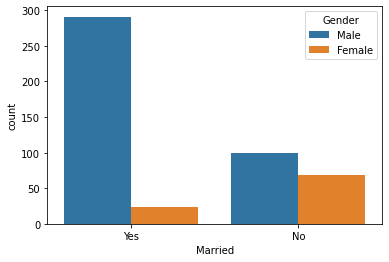

In [4]:
sns.countplot(x = X_train['Married'], hue = X_train['Gender'])

In [5]:
X_train[X_train['Gender'].isna() == True]['Married'].value_counts(dropna = False)

Yes    5
No     1
Name: Married, dtype: int64

In [6]:
X_train['Gender'] = X_train['Gender'].fillna('Male')
X_test['Gender'] = X_test['Gender'].fillna('Male')

## 2. Married

In [7]:
X_train['Married'].value_counts(dropna = False)

Yes    319
No     169
NaN      3
Name: Married, dtype: int64

In [8]:
X_train['Married'] = X_train['Married'].fillna(X_train['Married'].mode()[0])
X_test['Married'] = X_test['Married'].fillna(X_train['Married'].mode()[0])


## 3. Dependents
- Mode of Dependents feature is '0'

In [9]:
X_train['Dependents'].value_counts(dropna = False)

0      271
2       85
1       77
3+      43
NaN     15
Name: Dependents, dtype: int64

In [10]:
X_train[X_train['Dependents'].isna() == True]['Married'].value_counts(dropna = False)

Yes    11
No      4
Name: Married, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

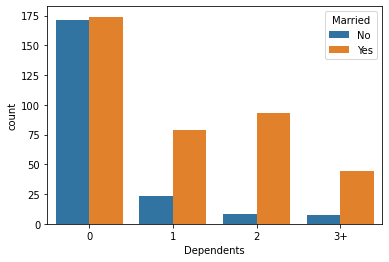

In [11]:
sns.countplot(x = df['Dependents'], hue = df['Married'])

In [12]:
X_test['Dependents'] = X_test['Dependents'].fillna(X_train['Dependents'].mode()[0])
X_train['Dependents'] = X_train['Dependents'].fillna(X_train['Dependents'].mode()[0])


In [13]:
X_train['Dependents'] = X_train['Dependents'].replace('3+', 3).astype('int64')
X_test['Dependents'] = X_test['Dependents'].replace('3+', 3).astype('int64')


## 4. Self_Employed

In [14]:
X_train['Self_Employed'].value_counts(dropna = False)

No     398
Yes     68
NaN     25
Name: Self_Employed, dtype: int64

In [15]:
X_train['Self_Employed'] = X_train['Self_Employed'].fillna(X_train['Self_Employed'].mode()[0])
X_test['Self_Employed'] = X_test['Self_Employed'].fillna(X_train['Self_Employed'].mode()[0])


## 5. LoanAmount

In [16]:
X_train['LoanAmount'].isna().sum()

18

In [17]:
X_train['LoanAmount'].mean()

142.92389006342495

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

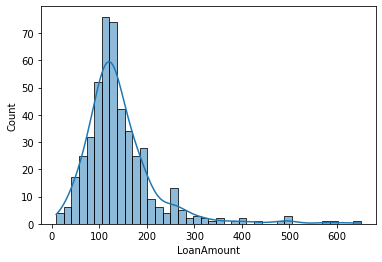

In [18]:
sns.histplot(X_train['LoanAmount'], kde = True)

In [19]:
X_train['LoanAmount'].median()

127.0

In [20]:
X_train['LoanAmount'] = X_train['LoanAmount'].fillna(X_train['LoanAmount'].median())
X_test['LoanAmount'] = X_test['LoanAmount'].fillna(X_train['LoanAmount'].median())

## 6. Loan_Amount_Term

In [21]:
X_train['Loan_Amount_Term'].value_counts(dropna = False)

360.0    408
180.0     39
480.0     13
300.0     11
NaN        8
240.0      3
120.0      3
36.0       2
84.0       2
60.0       2
Name: Loan_Amount_Term, dtype: int64

In [22]:
X_train['Loan_Amount_Term'] = X_train['Loan_Amount_Term'].fillna(360)
X_test['Loan_Amount_Term'] = X_test['Loan_Amount_Term'].fillna(360)

## 7. Credit_History

In [23]:
X_train['Credit_History'].value_counts(dropna = False)

1.0    385
0.0     69
NaN     37
Name: Credit_History, dtype: int64

In [24]:
X_train['Credit_History'] = X_train['Credit_History'].fillna(1)
X_test['Credit_History'] = X_test['Credit_History'].fillna(1)

In [25]:
X_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# --> Handling Categorical values

## 1. Gender

In [26]:
X_train['Gender'] = X_train['Gender'].apply(lambda x: 0 if x == 'Male' else 1)
X_test['Gender'] = X_test['Gender'].apply(lambda x: 0 if x == 'Male' else 1)

## 2. Married

In [27]:
X_train['Married'] = X_train['Married'].apply(lambda x: 0 if x == 'Yes' else 1)
X_test['Married'] = X_test['Married'].apply(lambda x: 0 if x == 'Yes' else 1)

## 3. Property_Area

In [28]:
from sklearn.preprocessing import OneHotEncoder

In [29]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

cat_X_train = pd.DataFrame(encoder.fit_transform(X_train[['Property_Area']]), columns = {'Property_Rural', 'Property_Semiurban', 'Property_Urban'})
cat_X_train.index = X_train.index
X_train = X_train.join(cat_X_train)

In [30]:
cat_X_test = pd.DataFrame(encoder.transform(X_test[['Property_Area']]), 
                         columns = {'Property_Rural', 'Property_Semiurban', 'Property_Urban'})
cat_X_test.index = X_test.index
X_test = X_test.join(cat_X_test)

In [31]:
X_test = X_test.drop(['Property_Area'], axis = 1)
X_train = X_train.drop(['Property_Area'], axis = 1)

## 4. Education

In [32]:
X_train['Education'].value_counts(dropna = False)

Graduate        379
Not Graduate    112
Name: Education, dtype: int64

In [33]:
X_train['Education'] = X_train['Education'].apply(lambda x: 0 if x == 'Graduate' else 1)
X_test['Education'] = X_test['Education'].apply(lambda x: 0 if x == 'Graduate' else 1)

## 5. Self_Employed

In [34]:
X_train['Self_Employed'].value_counts(dropna = False)

No     423
Yes     68
Name: Self_Employed, dtype: int64

In [35]:
X_train['Self_Employed'] = X_train['Self_Employed'].apply(lambda x: 0 if x == 'Yes' else 1)
X_test['Self_Employed'] = X_test['Self_Employed'].apply(lambda x: 0 if x == 'Yes' else 1)

In [36]:
X_train = X_train.drop(['Loan_ID'], axis = 1)
X_test = X_test.drop(['Loan_ID'], axis = 1)

In [37]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Urban,Property_Rural,Property_Semiurban
172,0,0,3,1,1,3522,0.0,81.0,180.0,1.0,1.0,0.0,0.0
474,0,1,2,0,1,5532,4648.0,162.0,360.0,1.0,1.0,0.0,0.0
273,0,0,0,0,1,2620,2223.0,150.0,360.0,1.0,0.0,1.0,0.0
25,0,0,0,0,0,9560,0.0,191.0,360.0,1.0,0.0,1.0,0.0
411,0,0,0,0,1,6256,0.0,160.0,360.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,0,1,0,0,1,2965,5701.0,155.0,60.0,1.0,0.0,0.0,1.0
174,0,0,0,1,0,4344,736.0,87.0,360.0,1.0,0.0,1.0,0.0
120,0,0,0,0,1,5667,2667.0,180.0,360.0,1.0,1.0,0.0,0.0
275,0,0,1,0,1,2750,1842.0,115.0,360.0,1.0,0.0,1.0,0.0


## Outlier (Not using)

In [38]:
# sns.histplot(np.log(X_train['LoanAmount']), kde = True)

In [39]:
# X_train['LoanAmount'] = np.log(X_train['LoanAmount'])
# X_test['LoanAmount'] = np.log(X_test['LoanAmount'])

## Standardization (Not using)

In [40]:
# from sklearn.preprocessing import StandardScaler

In [41]:
# std = StandardScaler()

# clm = X_train.columns

# X_train_std = pd.DataFrame(std.fit_transform(X_train), columns=clm)
# X_train_std.index = X_train.index
# X_train = X_train_std

# X_test_std = pd.DataFrame(std.transform(X_test), columns=clm)
# X_test_std.index = X_test.index
# X_test = X_test_std

# Model

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [43]:
model = LogisticRegression(random_state = 18)
model.fit(X_train, y_train)

pred = model.predict(X_test)

In [44]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[18 25]
 [ 2 78]]
              precision    recall  f1-score   support

           N       0.90      0.42      0.57        43
           Y       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



## First Model without outlier and without std
[[18 25]
 [ 2 78]]
              precision    recall  f1-score   support

           N       0.90      0.42      0.57        43
           Y       0.76      0.97      0.85        80

- accuracy                           0.78       123
- macro avg       0.83      0.70      0.71       123
- weighted avg       0.81      0.78      0.75       123
- accuracy_score = **0.7804878048780488**

## With Standardization and After Handling Outliers
- Still get the same result, thats why I am not using Standardization and Outliers 
- accuracy_score = **0.7804878048780488**



In [45]:
print(accuracy_score(y_test, pred))

0.7804878048780488


# Saving Model using 'Pickle'

In [47]:
# pickle.dump(model, open('model.pkl', 'wb'))